In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline


In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
#Reading the dataset
from sklearn.datasets import load_boston
boston_hp = load_boston()

In [43]:
#extracting the independent variables(Features)
data = pd.DataFrame(boston_hp.data)

In [44]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
#Feature names
data.columns = boston_hp.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
#Adding target variable to dataframe
data['PRICE'] = boston_hp.target
# Median value of owner-occupied homes in $1000s

In [47]:
#shape of the dataset
data.shape

(506, 14)

In [48]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [49]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [50]:
#identifying the unique value of the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [51]:
#checking for the null values in the dataset 
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [52]:
# To know the rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

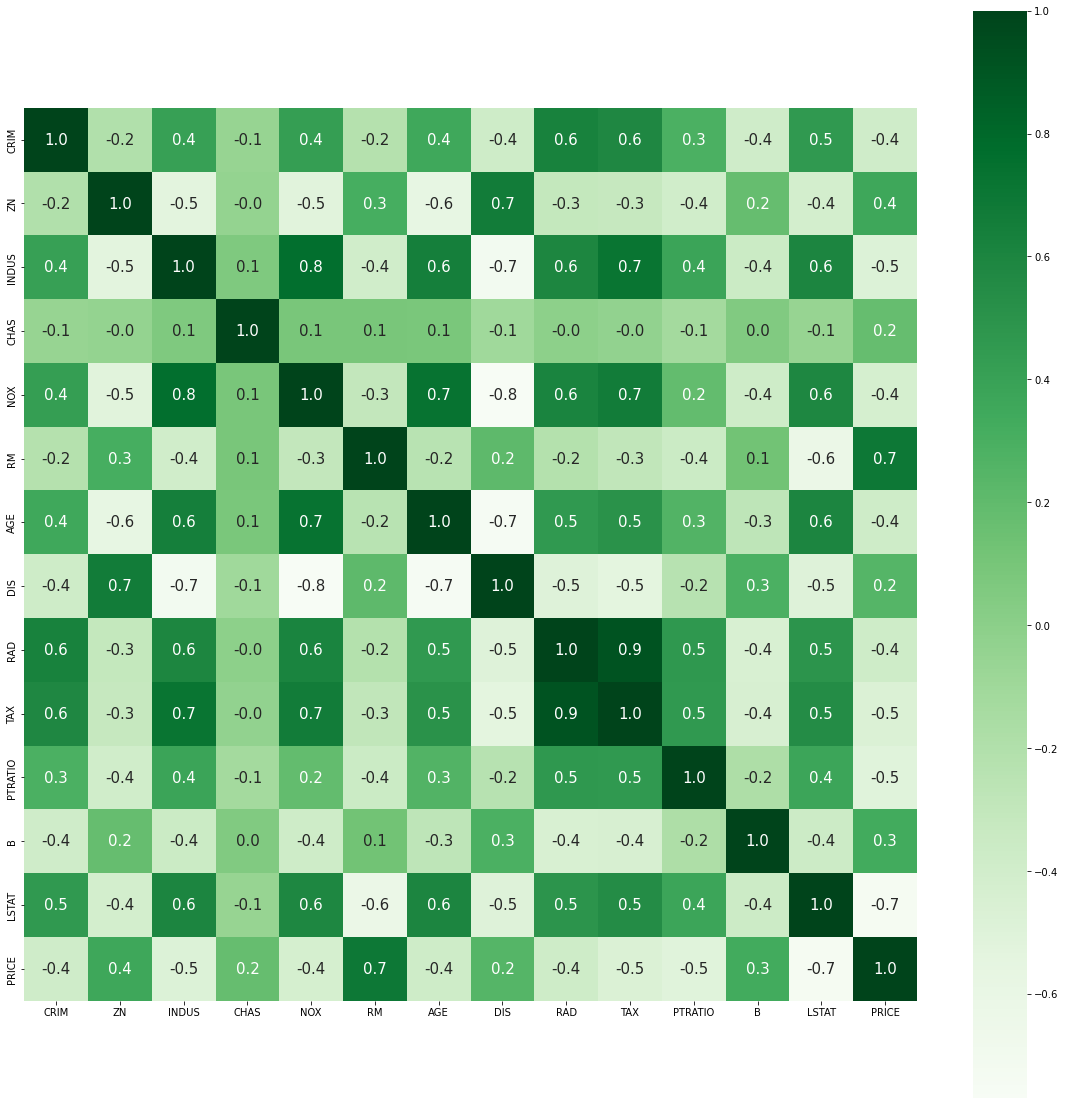

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

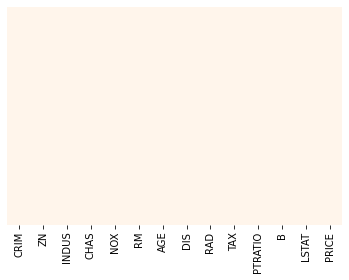

In [17]:
#checking the null values using heatmap
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Oranges')
plt.show()

In [18]:
#Splitting target variable and independent variables
X = data.drop(['PRICE'],axis = 1)
y = data['PRICE']


In [19]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [53]:
X_train.to_csv("D:/GUVI/Train.csv")

In [54]:
X_test.to_csv("D:/GUVI/Test.csv")

In [22]:
#importing  linear regression and cross - validation from sklearn library

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [23]:
 lr.fit(X_train, y_train)

LinearRegression()

In [24]:
#value of y intercept
lr.intercept_

34.48752018890176

In [25]:
#Converting the coefficient values to a dataframe
coefficients = pd.DataFrame([X_train.columns,lr.coef_]).T
coefficients = coefficients.rename(columns = {0:'Attribute', 1:'Coefficients'})
coefficients

,Attribute,Coefficients
0,CRIM,-0.126415
1,ZN,0.042139
2,INDUS,-0.011366
3,CHAS,2.715946
4,NOX,-16.02499
5,RM,3.972461
6,AGE,-0.004149
7,DIS,-1.346477
8,RAD,0.286397
9,TAX,-0.011792


In [26]:
# Model prediction on train data
y_pred = lr.predict(X_train)

In [27]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7501736684619289
Adjusted R^2: 0.7418461240773265
MAE: 3.0240726462748437
MSE: 19.228853961467372
RMSE: 4.38507171679864


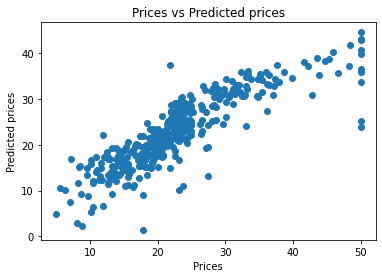

In [28]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


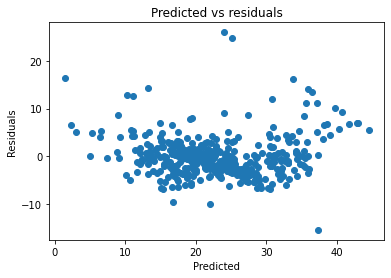

In [29]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\ARJUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


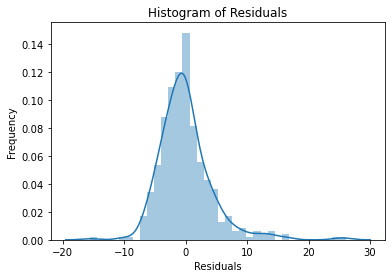

In [30]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [31]:
# Predicting Test data with the model
y_test_pred = lr.predict(X_test)

In [32]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7009532387355593
Adjusted R^2: 0.6567758762760396
MAE: 4.067489808238849
MSE: 33.91996497518334
RMSE: 5.824084904530783


In [33]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [35]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9809282015852989
Adjusted R^2: 0.9802924749714755
MAE: 0.8196608910891081
MSE: 1.4679350420792092
RMSE: 1.2115836917354117


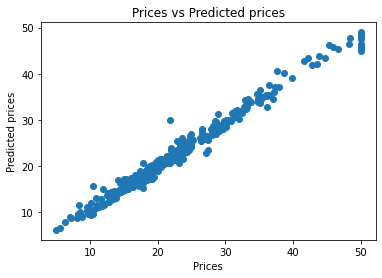

In [36]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

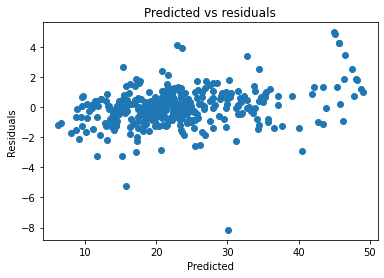

In [37]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [38]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [39]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8437804492555336
Adjusted R^2: 0.8207025610773738
MAE: 2.6542941176470585
MSE: 17.71950870588234
RMSE: 4.209454680345465


In [59]:
# Import XGBoost Regressor
import xgboost as xgb

#Create a XGBoost Regressor
reg = xgb.XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [60]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [61]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999920423946749
Adjusted R^2: 0.999991777141164
MAE: 0.016911597535161742
MSE: 0.0006124880021207695
RMSE: 0.024748494946577448


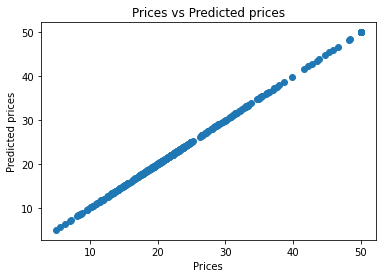

In [62]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

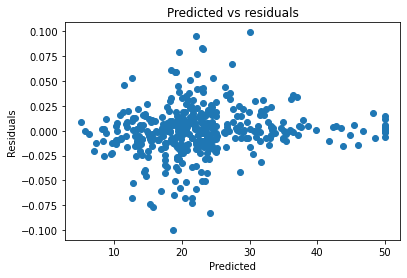

In [63]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [64]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [65]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8518224606039873
Adjusted R^2: 0.8299325968295763
MAE: 2.3446684930838795
MSE: 16.80732780776402
RMSE: 4.099674109946304


#### SVM REGRESSOR

In [67]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [69]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [70]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [71]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6933611666497848
Adjusted R^2: 0.6831398722047776
MAE: 2.7763929216804297
MSE: 23.601648829829127
RMSE: 4.858152820756993


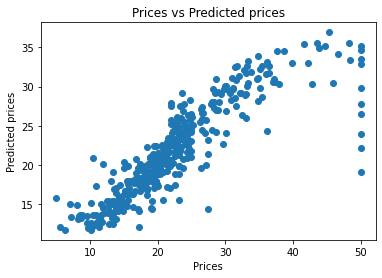

In [72]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

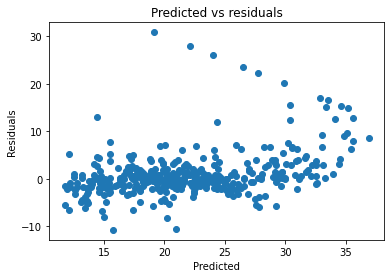

In [73]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [74]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [75]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5612556006906213
Adjusted R^2: 0.4964410871562813
MAE: 4.1229488461178025
MSE: 49.76544335309475
RMSE: 7.05446265516338


#### Evaluation and comparision of all the models

In [78]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.182246
1,Random Forest,84.378045
0,Linear Regression,70.095324
3,Support Vector Machines,56.125560


## working of code

In [ ]:
import numpy as np

# Import phi from train data set
phi = np.loadtxt('D:/GUVI/train.csv', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14)))

# Import y from train data set
y = np.loadtxt('D:/GUVI/train.csv', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)

# Import phi_test from test data set
phi_test = np.loadtxt('data/test.csv', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))


# Add a cloloumn of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

# Min Max scaling for phi and phi_test (Feature Engineering)
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)

# Log scaling on y
y = np.log(y)


# Function to calculate change in error function
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw


# Dictionary containing filenames as keys and p as values
filenames = {'output.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lambd = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('D:/GUVI/test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))

    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,PRICE', comments='')